In [1]:
# run gee conda env

import pandas as pd
import ee
import geemap
print(ee.__version__) #1.5.19
print(geemap.__version__) #0.35.3


# !pip uninstall geemap
# !pip install --upgrade --force-reinstall earthengine-api==1.5.19
# !pip install --user geemap==0.35.3

/home/athapa2/.local/lib/python3.11/site-packages/geemap/conversion.py:23: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


1.6.9
0.35.3


In [2]:
# EE_PROJECT_ID = "ee-thapa2012ses"  # Change the project ID to your own
# EE_PROJECT_ID = "ee-glacial-lake"  # Change the project ID to your own
# EE_PROJECT_ID = "ee-my-aamrit2044"  # Change the project ID to your own
# EE_PROJECT_ID = "glacier-174809"  # Change the project ID to your own
EE_PROJECT_ID = "ee-athapa2"  # Change the project ID to your own

ee.Authenticate()
ee.Initialize(project=EE_PROJECT_ID)

https://insu.hal.science/insu-03859269v1/file/apme-JAMC-D-21-0091.1.pdf

# point based method

In [27]:
# y1=27.735;x1=86.898 #Mera La
x1=81.5955;y1=30.2415
my_point = ee.Geometry.Point(x1, y1)
start_date ='2022-01-01' # memory limit issue even for 6 month data
end_date = '2022-06-01'

start_date, end_date

('2022-01-01', '2022-06-01')

In [28]:
era5_land_daily = (
    ee.ImageCollection('ECMWF/ERA5/HOURLY')
    .filter(ee.Filter.date(start_date, end_date))
    .select("temperature_2m")
)

In [29]:
# Import the ERA5 image collection.
ERA5_my_variable_my_point = era5_land_daily.getRegion(my_point,scale=1).getInfo() # scale does not matter as we are extracing for points

In [7]:
# ERA5_my_variable_my_point

In [30]:
df_ERA5_my_point_m1 = pd.DataFrame(
    ERA5_my_variable_my_point[1:],          # data (skip first row)
    columns=ERA5_my_variable_my_point[0]    # first row = header
)

print(df_ERA5_my_point_m1.head)
df_ERA5_my_point_m1.head()

<bound method NDFrame.head of                id  longitude   latitude           time  temperature_2m
0     20220101T00    81.5955  30.241501  1640995200000      246.605560
1     20220101T01    81.5955  30.241501  1640998800000      247.116760
2     20220101T02    81.5955  30.241501  1641002400000      249.069885
3     20220101T03    81.5955  30.241501  1641006000000      246.506897
4     20220101T04    81.5955  30.241501  1641009600000      245.667206
...           ...        ...        ...            ...             ...
3619  20220531T19    81.5955  30.241501  1654023600000      273.500702
3620  20220531T20    81.5955  30.241501  1654027200000      272.584320
3621  20220531T21    81.5955  30.241501  1654030800000      272.526489
3622  20220531T22    81.5955  30.241501  1654034400000      271.601196
3623  20220531T23    81.5955  30.241501  1654038000000      271.586456

[3624 rows x 5 columns]>


,id,longitude,latitude,time,temperature_2m
0,20220101T00,81.5955,30.241501,1640995200000,246.605560
1,20220101T01,81.5955,30.241501,1640998800000,247.116760
2,20220101T02,81.5955,30.241501,1641002400000,249.069885
3,20220101T03,81.5955,30.241501,1641006000000,246.506897
4,20220101T04,81.5955,30.241501,1641009600000,245.667206


cross check wuth gee code

https://code.earthengine.google.com/35649ab4bd6efee8cfcd223641a6b0aa

In [40]:
df_ERA5_my_point_m1["Date"] = pd.to_datetime(df_ERA5_my_point_m1["id"].astype(str), format="%Y%m%dT%H")
df_ERA5_my_point_m1["temperature_2m"] = df_ERA5_my_point_m1["temperature_2m"]-273.15
df_ERA5_my_point_m1.head()

,id,longitude,latitude,time,temperature_2m,Date
0,20240101T00,81.5955,30.241501,1704067200000,-26.262137,2024-01-01 00:00:00
1,20240101T01,81.5955,30.241501,1704070800000,-24.708807,2024-01-01 01:00:00
2,20240101T02,81.5955,30.241501,1704074400000,-23.066046,2024-01-01 02:00:00
3,20240101T03,81.5955,30.241501,1704078000000,-23.405051,2024-01-01 03:00:00
4,20240101T04,81.5955,30.241501,1704081600000,-22.699973,2024-01-01 04:00:00


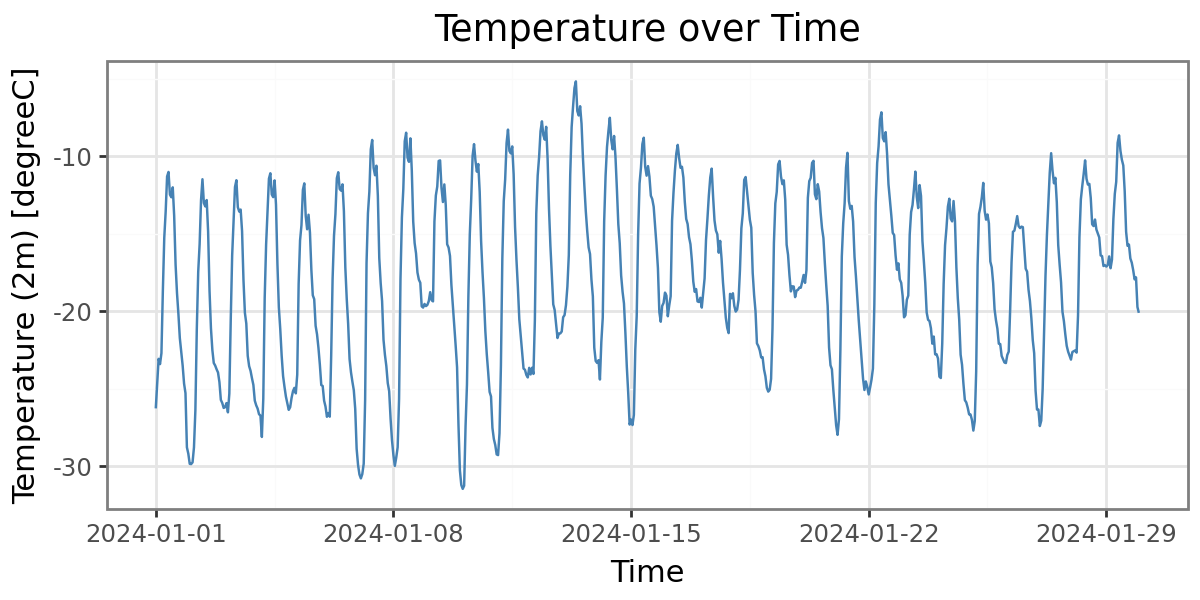

In [41]:
from  plotnine import*

# Plot using plotnine
p = (
    ggplot(df_ERA5_my_point_m1, aes(x='Date', y='temperature_2m')) +

    geom_line(color='steelblue') +
    # geom_point(size=2, color='darkblue') +
    labs(
        title='Temperature over Time',
        x='Time',
        y='Temperature (2m) [degreeC]'
    ) +
    theme_bw() +
    theme(figure_size=(6, 3))
)

p.show()

In [42]:
df_ERA5_my_point_m1["DateTime_local"] = (
    df_ERA5_my_point_m1["Date"]
      .dt.tz_localize("UTC")
      .dt.tz_convert("Asia/Kathmandu")   # UTC+5:45
)

df_ERA5_my_point_m1.head()

,id,longitude,latitude,time,temperature_2m,Date,DateTime_local
0,20240101T00,81.5955,30.241501,1704067200000,-26.262137,2024-01-01 00:00:00,2024-01-01 05:45:00+05:45
1,20240101T01,81.5955,30.241501,1704070800000,-24.708807,2024-01-01 01:00:00,2024-01-01 06:45:00+05:45
2,20240101T02,81.5955,30.241501,1704074400000,-23.066046,2024-01-01 02:00:00,2024-01-01 07:45:00+05:45
3,20240101T03,81.5955,30.241501,1704078000000,-23.405051,2024-01-01 03:00:00,2024-01-01 08:45:00+05:45
4,20240101T04,81.5955,30.241501,1704081600000,-22.699973,2024-01-01 04:00:00,2024-01-01 09:45:00+05:45


In [51]:
# already done, but just to be safe
# df_ERA5_my_point_m1["NDate"] = df_ERA5_my_point_m1["Date"] + pd.Timedelta(hours=5, minutes=45)
# df_ERA5_my_point_m1.head()

In [52]:
# df_ERA5_my_point_m1["Date_4_calc"] = df_ERA5_my_point_m1["NDate"].dt.date
df_ERA5_my_point_m1["Date_4_calc"] = df_ERA5_my_point_m1["DateTime_local"].dt.date

In [53]:
df_daily = (
    df_ERA5_my_point_m1.groupby("Date_4_calc", as_index=False)
      .agg(daily_mean_temperature=("temperature_2m", "mean"))
)

df_daily.head()

,Date_4_calc,daily_mean_temperature
0,2024-01-01,-17.958713
1,2024-01-02,-21.565930
2,2024-01-03,-20.381747
3,2024-01-04,-20.155914
4,2024-01-05,-20.047476


In [55]:
df_daily["Date"] = pd.to_datetime(df_daily["Date_4_calc"].astype(str), format="%Y-%m-%d")

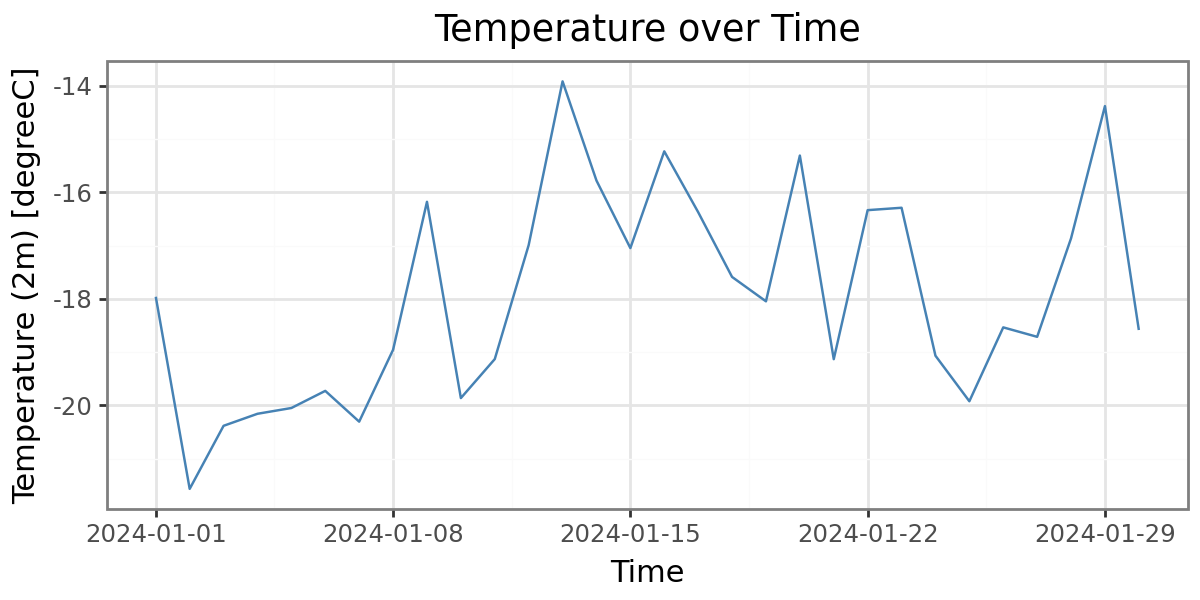

In [56]:
from  plotnine import*

# Plot using plotnine
p = (
    ggplot(df_daily, aes(x='Date', y='daily_mean_temperature')) +

    geom_line(color='steelblue') +
    # geom_point(size=2, color='darkblue') +
    labs(
        title='Temperature over Time',
        x='Time',
        y='Temperature (2m) [degreeC]'
    ) +
    theme_bw() +
    theme(figure_size=(6, 3))
)

p.show()

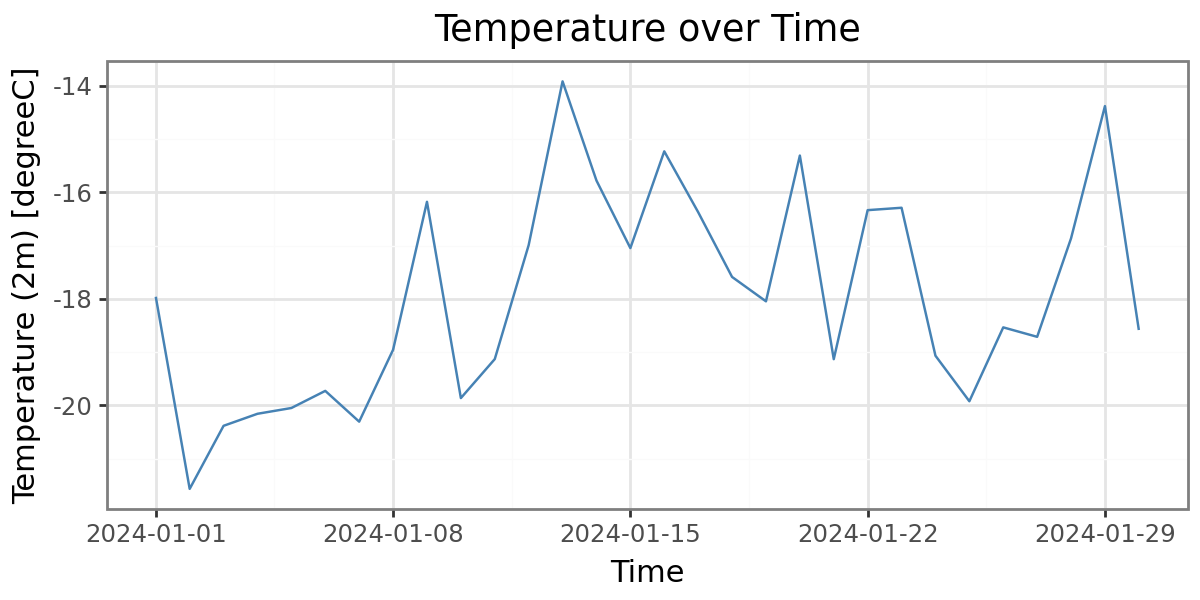

In [57]:
from  plotnine import*

# Plot using plotnine
p = (
    ggplot(df_daily, aes(x='Date', y='daily_mean_temperature')) +

    geom_line(color='steelblue') +
    # geom_point(size=2, color='darkblue') +
    labs(
        title='Temperature over Time',
        x='Time',
        y='Temperature (2m) [degreeC]'
    ) +
    theme_bw() +
    theme(figure_size=(6, 3))
)

p.show()

loop for many years

In [31]:
import pandas as pd

def fetch_era5_hourly_point_month(x1, y1, start_date, end_date, scale=1000):
    """Fetch ERA5 hourly temperature_2m for a point between start_date and end_date (YYYY-MM-DD)."""
    my_point = ee.Geometry.Point(x1, y1)

    ic = (
        ee.ImageCollection("ECMWF/ERA5/HOURLY")
        .filterDate(start_date, end_date)
        .select("temperature_2m")
    )

    region = ic.getRegion(my_point, scale=scale).getInfo()

    df = pd.DataFrame(region[1:], columns=region[0])

    # Convert types
    df["time"] = pd.to_datetime(df["time"], unit="ms", utc=True)
    df["temperature_2m"] = pd.to_numeric(df["temperature_2m"], errors="coerce")

    # Helpful: store the request window
    df["start_date"] = start_date
    df["end_date"] = end_date

    return df


# ---- Your point ----
x1, y1 = 81.5955, 30.2415

# ---- build monthly windows ----
start_all = "2020-01-01"
end_all   = "2022-12-31"

starts = pd.date_range(start_all, end_all, freq="MS")           # month starts
ends   = (starts + pd.offsets.MonthBegin(1))                    # next month start

dfs = []
for s, e in zip(starts, ends):
    s_str = s.strftime("%Y-%m-%d")
    e_str = e.strftime("%Y-%m-%d")

    print(f"Fetching {s_str} -> {e_str}")
    df_m = fetch_era5_hourly_point_month(x1, y1, s_str, e_str, scale=1000)
    dfs.append(df_m)

df_ERA5_my_point_all = pd.concat(dfs, ignore_index=True)

df_ERA5_my_point_all.head()


Fetching 2020-01-01 -> 2020-02-01
Fetching 2020-02-01 -> 2020-03-01
Fetching 2020-03-01 -> 2020-04-01
Fetching 2020-04-01 -> 2020-05-01
Fetching 2020-05-01 -> 2020-06-01
Fetching 2020-06-01 -> 2020-07-01
Fetching 2020-07-01 -> 2020-08-01
Fetching 2020-08-01 -> 2020-09-01
Fetching 2020-09-01 -> 2020-10-01
Fetching 2020-10-01 -> 2020-11-01
Fetching 2020-11-01 -> 2020-12-01
Fetching 2020-12-01 -> 2021-01-01
Fetching 2021-01-01 -> 2021-02-01
Fetching 2021-02-01 -> 2021-03-01
Fetching 2021-03-01 -> 2021-04-01
Fetching 2021-04-01 -> 2021-05-01
Fetching 2021-05-01 -> 2021-06-01
Fetching 2021-06-01 -> 2021-07-01
Fetching 2021-07-01 -> 2021-08-01
Fetching 2021-08-01 -> 2021-09-01
Fetching 2021-09-01 -> 2021-10-01
Fetching 2021-10-01 -> 2021-11-01
Fetching 2021-11-01 -> 2021-12-01
Fetching 2021-12-01 -> 2022-01-01
Fetching 2022-01-01 -> 2022-02-01
Fetching 2022-02-01 -> 2022-03-01
Fetching 2022-03-01 -> 2022-04-01
Fetching 2022-04-01 -> 2022-05-01
Fetching 2022-05-01 -> 2022-06-01
Fetching 2022-

,id,longitude,latitude,time,temperature_2m,start_date,end_date
0,20200101T00,81.598469,30.241784,2020-01-01 00:00:00+00:00,252.071762,2020-01-01,2020-02-01
1,20200101T01,81.598469,30.241784,2020-01-01 01:00:00+00:00,251.818039,2020-01-01,2020-02-01
2,20200101T02,81.598469,30.241784,2020-01-01 02:00:00+00:00,251.215637,2020-01-01,2020-02-01
3,20200101T03,81.598469,30.241784,2020-01-01 03:00:00+00:00,251.784271,2020-01-01,2020-02-01
4,20200101T04,81.598469,30.241784,2020-01-01 04:00:00+00:00,253.198395,2020-01-01,2020-02-01


In [34]:
df_ERA5_my_point_all["Date"] = pd.to_datetime(df_ERA5_my_point_all["id"].astype(str), format="%Y%m%dT%H")
df_ERA5_my_point_all["temperature_2m"] = df_ERA5_my_point_all["temperature_2m"]-273.15

df_ERA5_my_point_all["DateTime_local"] = (
    df_ERA5_my_point_all["Date"]
      .dt.tz_localize("UTC")
      .dt.tz_convert("Asia/Kathmandu")   # UTC+5:45
)

df_ERA5_my_point_all.head()


,id,longitude,latitude,time,temperature_2m,start_date,end_date,Date,DateTime_local
0,20200101T00,81.598469,30.241784,2020-01-01 00:00:00+00:00,-21.078238,2020-01-01,2020-02-01,2020-01-01 00:00:00,2020-01-01 05:45:00+05:45
1,20200101T01,81.598469,30.241784,2020-01-01 01:00:00+00:00,-21.331961,2020-01-01,2020-02-01,2020-01-01 01:00:00,2020-01-01 06:45:00+05:45
2,20200101T02,81.598469,30.241784,2020-01-01 02:00:00+00:00,-21.934363,2020-01-01,2020-02-01,2020-01-01 02:00:00,2020-01-01 07:45:00+05:45
3,20200101T03,81.598469,30.241784,2020-01-01 03:00:00+00:00,-21.365729,2020-01-01,2020-02-01,2020-01-01 03:00:00,2020-01-01 08:45:00+05:45
4,20200101T04,81.598469,30.241784,2020-01-01 04:00:00+00:00,-19.951605,2020-01-01,2020-02-01,2020-01-01 04:00:00,2020-01-01 09:45:00+05:45


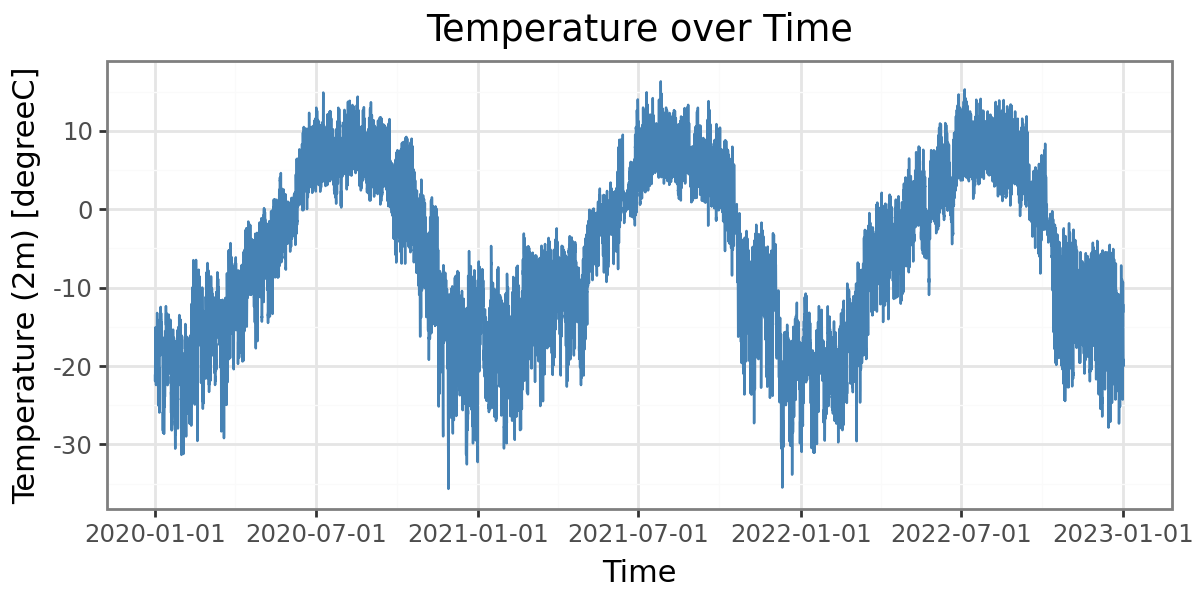

In [52]:
from  plotnine import*

# Plot using plotnine
p = (
    ggplot(df_ERA5_my_point_all, aes(x='DateTime_local', y='temperature_2m')) +

    geom_line(color='steelblue') +
    # geom_point(size=2, color='darkblue') +
    labs(
        title='Temperature over Time',
        x='Time',
        y='Temperature (2m) [degreeC]'
    ) +
    theme_bw() +
    theme(figure_size=(6, 3))
)

p.show()

In [62]:
df_ERA5_my_point_all["Date_4_calc"] = df_ERA5_my_point_all["DateTime_local"].dt.date

df_daily = (
    df_ERA5_my_point_all.groupby("Date_4_calc", as_index=False)
      .agg(daily_mean_temperature=("temperature_2m", "mean"))
)
df_daily["Date"] = pd.to_datetime(df_daily["Date_4_calc"].astype(str), format="%Y-%m-%d")
df_daily.head()

,Date_4_calc,daily_mean_temperature,Date
0,2020-01-01,-19.176124,2020-01-01
1,2020-01-02,-18.485140,2020-01-02
2,2020-01-03,-16.949487,2020-01-03
3,2020-01-04,-17.849333,2020-01-04
4,2020-01-05,-22.135240,2020-01-05


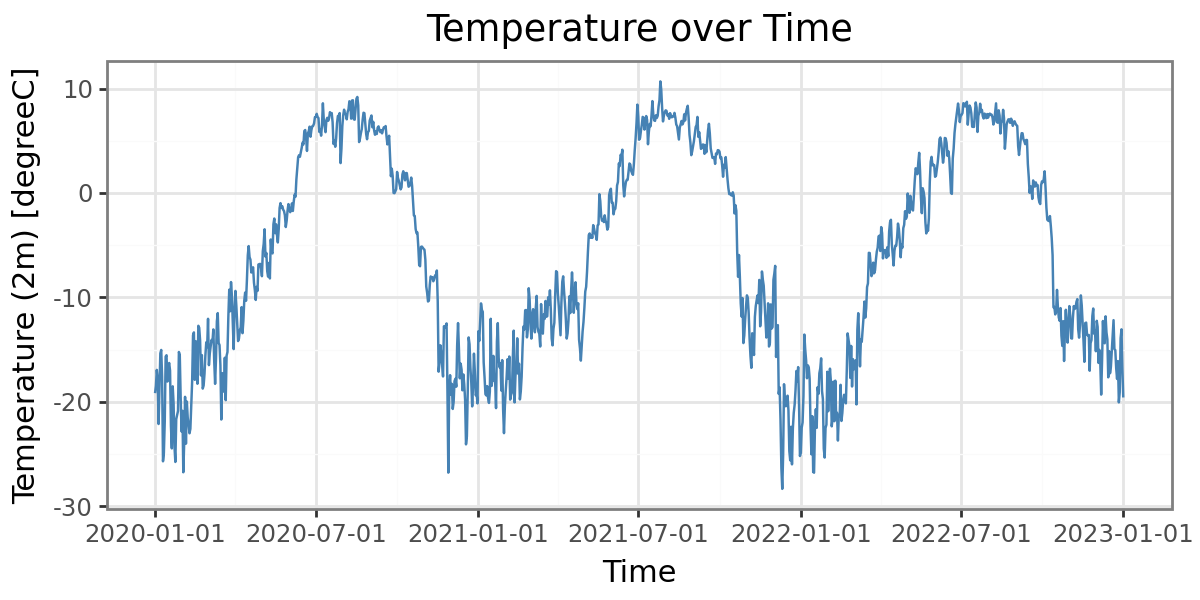

In [63]:
from  plotnine import*

# Plot using plotnine
p = (
    ggplot(df_daily, aes(x='Date', y='daily_mean_temperature')) +

    geom_line(color='steelblue') +
    # geom_point(size=2, color='darkblue') +
    labs(
        title='Temperature over Time',
        x='Time',
        y='Temperature (2m) [degreeC]'
    ) +
    theme_bw() +
    theme(figure_size=(6, 3))
)

p.show()